In [492]:
#importing the libraries and packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pylab
from pandas.plotting import scatter_matrix
import scipy.stats as stats
import statsmodels.api as sm 
from IPython.display import display, Math, Latex
from statistics import mode
import collections

# **Cleaning the Data**

We have 2 csv files namely "animes" and "profiles" to analyze. We will clean them one by one

In [493]:
dfanime = pd.read_csv('animes.csv')            #reading animes dataset
dfanime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         19311 non-null  int64  
 1   title       19311 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       19311 non-null  object 
 4   aired       19311 non-null  object 
 5   episodes    18605 non-null  float64
 6   members     19311 non-null  int64  
 7   popularity  19311 non-null  int64  
 8   ranked      16099 non-null  float64
 9   score       18732 non-null  float64
 10  img_url     19131 non-null  object 
 11  link        19311 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.8+ MB


In [494]:
dfanime

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...,...,...,...,...,...,...,...,...,...,...
19306,32979,Flip Flappers,Cocona is an average middle schooler living wi...,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,1070.0,7.73,https://cdn.myanimelist.net/images/anime/4/822...,https://myanimelist.net/anime/32979/Flip_Flappers
19307,123,Fushigi Yuugi,"While visiting the National Library, junior-hi...","['Adventure', 'Fantasy', 'Magic', 'Martial Art...","Apr 6, 1995 to Mar 28, 1996",52.0,84407,1292,1071.0,7.73,https://cdn.myanimelist.net/images/anime/2/201...,https://myanimelist.net/anime/123/Fushigi_Yuugi
19308,1281,Gakkou no Kaidan,"Years ago, all of the ghosts in a haunted scho...","['Mystery', 'Horror', 'Supernatural']","Oct 22, 2000 to Mar 25, 2001",19.0,83093,1314,1073.0,7.73,https://cdn.myanimelist.net/images/anime/9/183...,https://myanimelist.net/anime/1281/Gakkou_no_K...
19309,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,Inuyasha and company have finally destroyed Na...,"['Action', 'Adventure', 'Comedy', 'Historical'...","Dec 21, 2002",1.0,71989,1469,1077.0,7.73,https://cdn.myanimelist.net/images/anime/1162/...,https://myanimelist.net/anime/450/InuYasha_Mov...


In [495]:
dfanime = dfanime.dropna()                                     #dropping null value entries
dfanime = dfanime.drop(["img_url", "link"], axis=1)            #dropping unwated columns

In [496]:
dfanime["Year"]=0                                            #making new column as age of the user
                                                             
for i in dfanime.index:                                      #using date aired to calculate the yaer of release
  for j in range(1955,2020):
    if (str(j) in str(dfanime["aired"][i]))==1 :
      dfanime["Year"][i]= j
      break
dfanime = dfanime.loc[~(dfanime['Year'] == 0)]              #dropping 0 value as 0 Age doesnt make sense

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [497]:
genrelist = []                                        
for lists in dfanime['genre']:
  lists = (lists.strip('[]')).split(', ')
  for entry in lists:
    if entry.strip("'") not in genrelist:
      genrelist.append(entry.strip("'"))
genrelist = genrelist[0:len(genrelist)-1]
genrelist=sorted(genrelist)
print(genrelist)

['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire']


In [498]:
dfanime[genrelist] = 0
for genres in genrelist:
  for i in dfanime.index:
    if genres in dfanime['genre'][i]:
      dfanime[genres][i] = 1
dfanime[genrelist]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3645: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
0,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19306,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19307,0,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
19308,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
19309,1,1,0,1,0,1,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [499]:
dfanime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14915 entries, 0 to 19310
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   uid            14915 non-null  int64  
 1   title          14915 non-null  object 
 2   synopsis       14915 non-null  object 
 3   genre          14915 non-null  object 
 4   aired          14915 non-null  object 
 5   episodes       14915 non-null  float64
 6   members        14915 non-null  int64  
 7   popularity     14915 non-null  int64  
 8   ranked         14915 non-null  float64
 9   score          14915 non-null  float64
 10  Year           14915 non-null  int64  
 11  Action         14915 non-null  int64  
 12  Adventure      14915 non-null  int64  
 13  Cars           14915 non-null  int64  
 14  Comedy         14915 non-null  int64  
 15  Dementia       14915 non-null  int64  
 16  Demons         14915 non-null  int64  
 17  Drama          14915 non-null  int64  
 18  Ecchi 

In [500]:
dfanime               #final animes datased after cleaning

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,...,0,1,0,0,0,1,0,0,0,0
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,...,0,1,0,0,0,0,0,0,0,0
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,...,0,0,0,0,0,0,0,0,0,0
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,...,0,1,0,0,0,0,0,0,0,0
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19306,32979,Flip Flappers,Cocona is an average middle schooler living wi...,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,1070.0,7.73,...,0,0,0,0,0,0,0,0,0,0
19307,123,Fushigi Yuugi,"While visiting the National Library, junior-hi...","['Adventure', 'Fantasy', 'Magic', 'Martial Art...","Apr 6, 1995 to Mar 28, 1996",52.0,84407,1292,1071.0,7.73,...,0,0,0,0,0,0,0,0,0,0
19308,1281,Gakkou no Kaidan,"Years ago, all of the ghosts in a haunted scho...","['Mystery', 'Horror', 'Supernatural']","Oct 22, 2000 to Mar 25, 2001",19.0,83093,1314,1073.0,7.73,...,0,0,0,0,0,0,0,1,0,0
19309,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,Inuyasha and company have finally destroyed Na...,"['Action', 'Adventure', 'Comedy', 'Historical'...","Dec 21, 2002",1.0,71989,1469,1077.0,7.73,...,0,1,0,0,0,0,0,1,0,0


In [501]:
dfprofile = pd.read_csv('profiles.csv')                   #reading profile dataset
dfprofile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81727 entries, 0 to 81726
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   profile          81727 non-null  object
 1   gender           53856 non-null  object
 2   birthday         46807 non-null  object
 3   favorites_anime  81727 non-null  object
 4   link             81727 non-null  object
dtypes: object(5)
memory usage: 3.1+ MB


In [502]:
dfprofile

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche
1,baekbeans,Female,"Nov 10, 2000","['11061', '31964', '853', '20583', '918', '925...",https://myanimelist.net/profile/baekbeans
2,skrn,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
3,edgewalker00,Male,Sep 5,"['5680', '849', '2904', '3588', '37349']",https://myanimelist.net/profile/edgewalker00
4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382...",https://myanimelist.net/profile/aManOfCulture99
...,...,...,...,...,...
81722,lovelessxd,Female,"Aug 6, 1992","['853', '5114']",https://myanimelist.net/profile/lovelessxd
81723,Shattered_Angel,Female,"Sep 6, 1994","['150', '27', '1520', '121', '31452', '32995',...",https://myanimelist.net/profile/Shattered_Angel
81724,FluffyWalrus,Male,NaN,"['121', '43', '237', '202', '205']",https://myanimelist.net/profile/FluffyWalrus
81725,camco,Female,Sep 23,"['199', '4224', '7054', '13601', '14713']",https://myanimelist.net/profile/camco


In [503]:
dfprofile = dfprofile.dropna()                             #dropping null value entries  
dfprofile = dfprofile.drop(["link"], axis=1)               #dropping unwanted column

In [504]:
dfprofile = dfprofile.loc[~(dfprofile['favorites_anime'] == '[]')]     #removing the entries with no actual data

In [505]:
dfprofile["Age"]=0                                           #making new column as age of the user
                                                             #using birthday to calculate age
for i in dfprofile.index:
  for j in range(1970,2020):
    if (str(j) in str(dfprofile["birthday"][i]))==1 :
      dfprofile["Age"][i]= 2020-j
      break
dfprofile = dfprofile.loc[~(dfprofile['Age'] == 0)]
print(dfprofile["Age"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        26
1        20
4        21
7        35
8        28
         ..
81715    24
81718    28
81719    28
81722    28
81723    26
Name: Age, Length: 33426, dtype: int64


In [506]:
dfprofile.info()                     #final profile dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33426 entries, 0 to 81723
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   profile          33426 non-null  object
 1   gender           33426 non-null  object
 2   birthday         33426 non-null  object
 3   favorites_anime  33426 non-null  object
 4   Age              33426 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


In [507]:
dfprofile                            #final profile dataset

,profile,gender,birthday,favorites_anime,Age
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2...",26
1,baekbeans,Female,"Nov 10, 2000","['11061', '31964', '853', '20583', '918', '925...",20
4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382...",21
7,NIGGER_BONER,Male,"Jan 1, 1985","['11061', '30', '6594', '28701', '10087', '674...",35
8,jchang,Male,"Jul 29, 1992","['846', '2904', '5114', '2924', '72']",28
...,...,...,...,...,...
81715,sango868,Female,"Feb 14, 1996","['269', '355', '5114', '4898', '934', '32995']",24
81718,HajisSoul,Male,"Nov 12, 1992",['150'],28
81719,samdineen20,Female,"Apr 18, 1992","['120', '150', '3457', '3655', '4898']",28
81722,lovelessxd,Female,"Aug 6, 1992","['853', '5114']",28


# **Data Visualization**

##Visualization of animes dataset

Histograms of different parameters of Animes

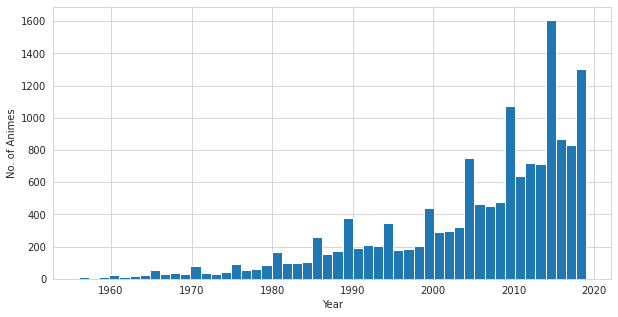

2005.0904458598727


In [508]:
plt.figure(figsize=(10,5))
plt.hist(dfanime["Year"], bins = 50)              #histogram of Year vs no of animes
plt.xlabel("Year")
plt.ylabel("No. of Animes")
plt.show()
print(dfanime["Year"].mean())

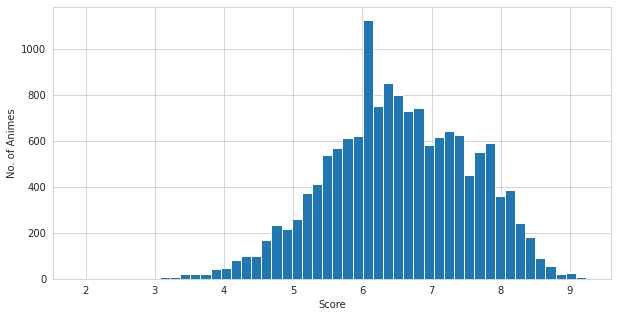

Mean = 6.514993630573248


In [509]:
plt.figure(figsize=(10,5))
plt.hist(dfanime["score"], bins = 50)                  #histogram of score vs no of animes
plt.xlabel("Score")
plt.ylabel("No. of Animes")
plt.show()
print("Mean = " + str(dfanime["score"].mean()))

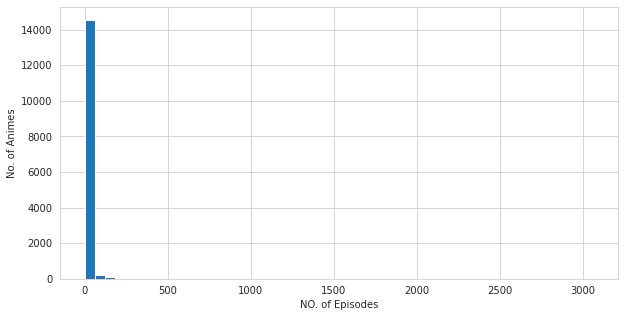

Mean = 13.249815621857191


In [510]:
plt.figure(figsize=(10,5))                                    
plt.hist(dfanime["episodes"],bins=50)            #histogram of episodes vs no of animes
plt.xlabel("NO. of Episodes")
plt.ylabel("No. of Animes")
plt.show()
print("Mean = " + str(dfanime["episodes"].mean()))

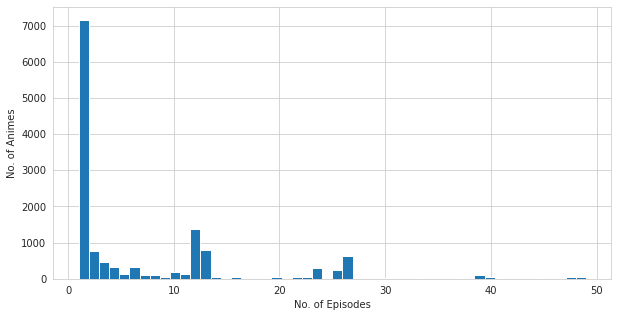

Mean = 13.249815621857191


In [511]:
plt.figure(figsize=(10,5))                                              #zoomed in version of above but includes movies and OVA's
dfanimecut = dfanime[dfanime["episodes"]<50]
plt.hist(dfanimecut[dfanimecut["episodes"]>0]["episodes"], bins = 50)
plt.xlabel("No. of Episodes")
plt.ylabel("No. of Animes")
plt.show()
print("Mean = " + str(dfanime["episodes"].mean()))

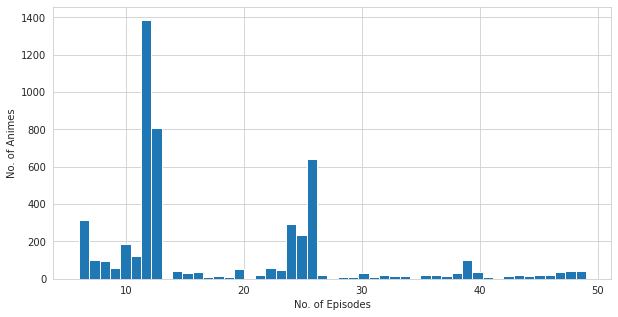

Mean = 30.67190342318505


In [512]:
plt.figure(figsize=(10,5))                                              #zoomed in version of above but excludes movie and ovas
dfanimecut = dfanime[dfanime["episodes"]>5]
plt.hist(dfanimecut[dfanimecut["episodes"]<50]["episodes"], bins = 49)
plt.xlabel("No. of Episodes")
plt.ylabel("No. of Animes")
plt.show()
print("Mean = " + str(dfanime[dfanime["episodes"]>5]["episodes"].mean()))

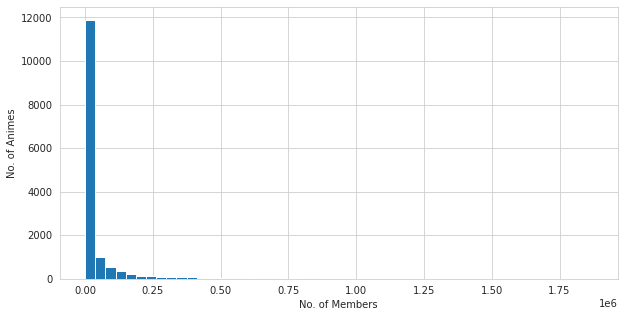

Mean = 43376.70050284948


In [513]:
plt.figure(figsize=(10,5))
plt.hist(dfanime["members"], bins = 50)              #histogram of members vs no of animes
plt.xlabel("No. of Members")
plt.ylabel("No. of Animes")
plt.show()
print("Mean = " + str(dfanime["members"].mean()))

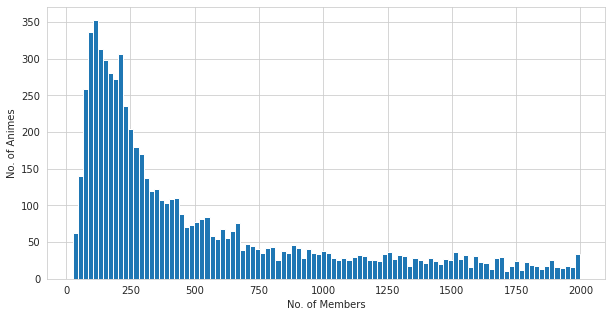

Mean = 43376.70050284948


In [514]:
plt.figure(figsize=(10,5))                                              #zoomed in version of above
plt.hist(dfanime[dfanime["members"]<2000]["members"], bins = 100)
plt.xlabel("No. of Members")
plt.ylabel("No. of Animes")
plt.show()
print("Mean = " + str(dfanime["members"].mean()))

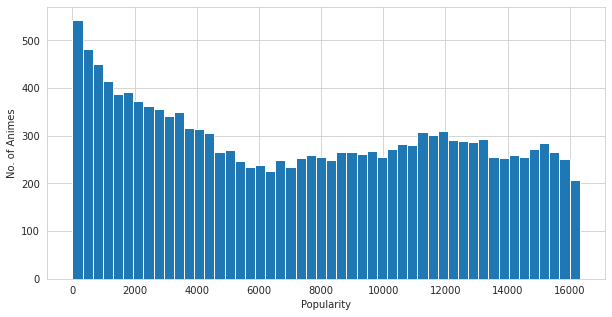

Mean = 7469.587060006705


In [515]:
plt.figure(figsize=(10,5))
plt.hist(dfanime["popularity"], bins = 50)                 #histogram of popularity vs no of animes
plt.xlabel("Popularity")
plt.ylabel("No. of Animes")
plt.show()
print("Mean = " + str(dfanime["popularity"].mean()))

Comparing Trends in Different Years

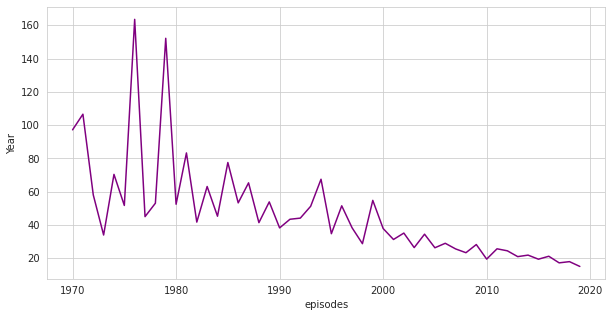

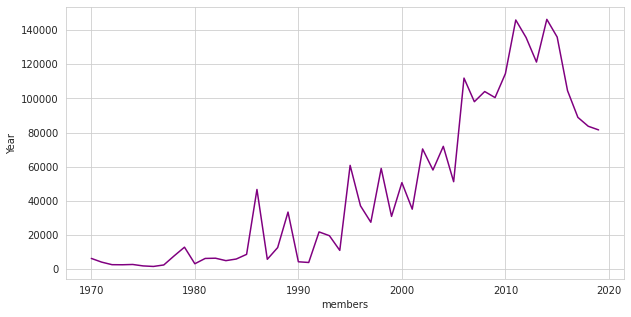

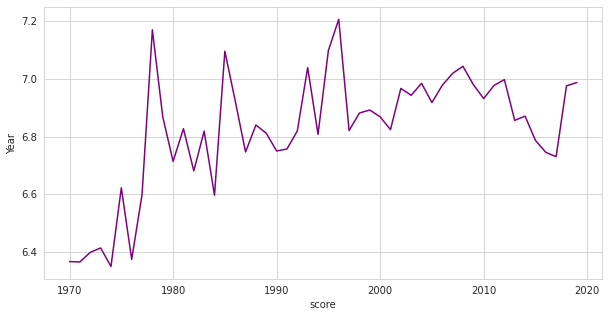

In [516]:
def year_plt_avg(parameter):                                                #fuction used to plot a line graph of a particular parameter vs time
  list1=[]
  for i in range(1970,2021):
    list1.append(dfanimecut[dfanimecut["Year"]==i][parameter].mean())          
  plt.figure(figsize=(10,5))
  plt.plot(range(1970,2021),list1,color ="purple")
  plt.xlabel(parameter)
  plt.ylabel("Year")
  plt.show()

plotlist1 = ["episodes","members","score"]                #parameters we want to plot against time
for i in plotlist1:
  year_plt_avg(i)

Comparing no of Episodes with other parameters

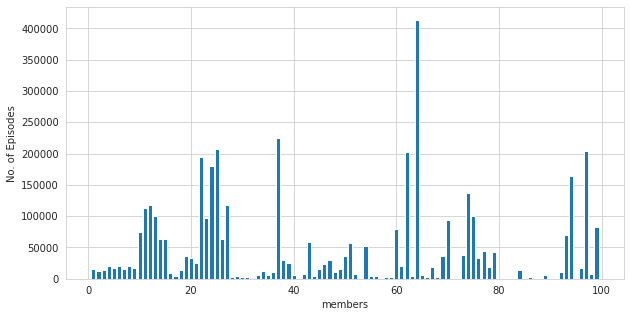

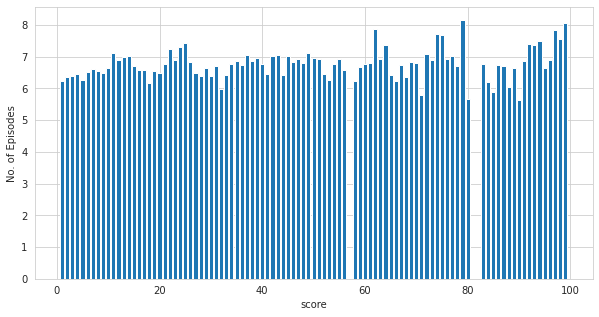

In [517]:
def episodes_plt_avg(parameter):
  list1=[]
  for i in range(0,100):
    list1.append(dfanime[dfanime["episodes"]==i][parameter].mean())      #fuction used to plot a line graph of a particular parameter vs no of episodes
  plt.figure(figsize=(10,5))
  plt.bar(range(0,100),list1)
  plt.xlabel(parameter)
  plt.ylabel("No. of Episodes")
  plt.show()

plotlist2 = ["members","score"]                    #parameters we want to plot against no of episodes
for i in plotlist2:
  episodes_plt_avg(i)

Other Plots

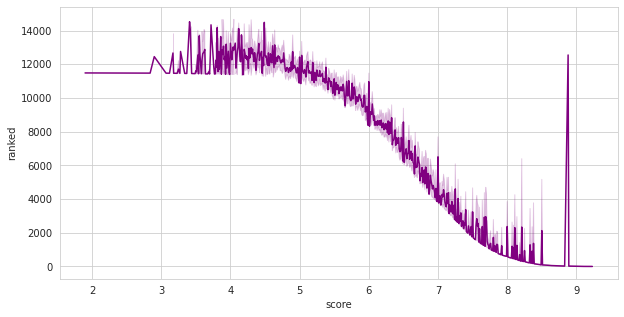

In [518]:
plt.figure(figsize=(10,5))                                  
sb.lineplot(x='score',y='ranked',data=dfanime,color="purple")                #line graph to plot ranking of anime vs score

In [519]:
dfgoodscore = dfanime[dfanime["score"]>8.5]                       #finding the outlier
df_outlier = dfgoodscore[dfgoodscore["ranked"]>10000]
df_outlier

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
10805,39405,Kaitei-koku no Koutsu Anzen,A traffic safety anime by Toei that uses compo...,"['Fantasy', 'Kids']",1990,1.0,36,16283,12550.0,8.88,...,0,0,0,0,0,0,0,0,0,0


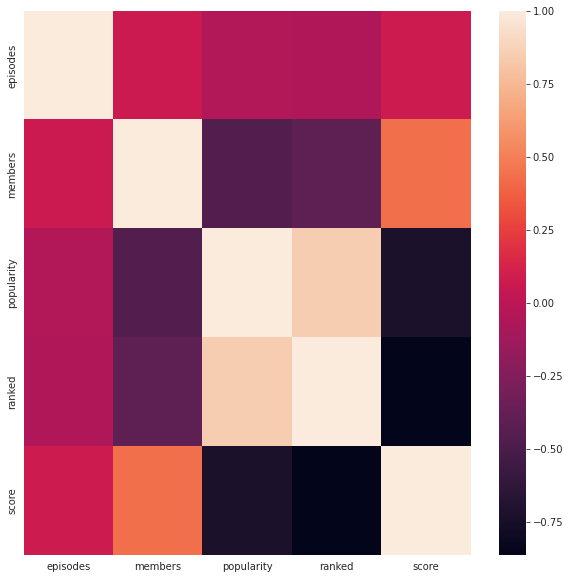

In [520]:
dfcorr = dfanime[["episodes","members","popularity","ranked","score"]]
plt.figure(figsize=(10,10))
corr = dfcorr.corr(method='pearson') 
sb.heatmap((corr), annot = False)                                 #color coded heat map by pearson method
plt.show()

## Visualization of profile of users

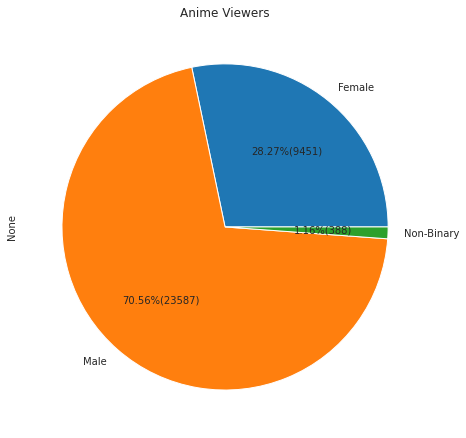

In [521]:
plt.figure(figsize=(15,7.5))                    
gender = dfprofile.groupby('gender').size()                #pie chart of anime viewers based on gender
gender.plot(kind='pie',title ="Anime Viewers", autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*gender.sum()))      

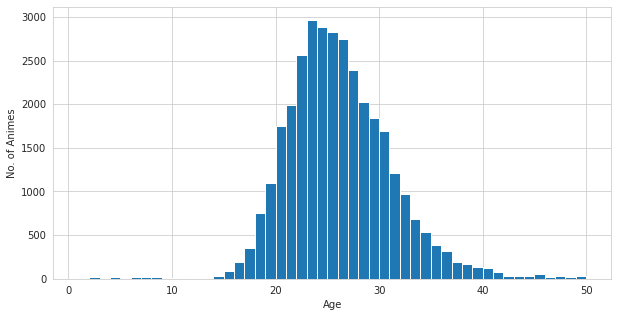

Mean = 25.65628552623706


In [522]:
plt.figure(figsize=(10,5))               #histogram of Age of users vs no users
plt.hist(dfprofile['Age'], bins=49)
plt.xlabel("Age")
plt.ylabel("No. of Animes")
plt.show()
print("Mean = " + str(dfprofile["Age"].mean()))

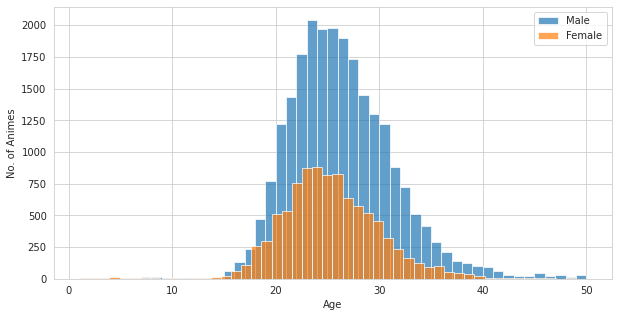

Mean Age of Male = 25.828676813498962
Mean Age of Female = 25.30229605332769


In [523]:
plt.figure(figsize=(10,5))                           #superimposed male and female graphs of no of users vs age
plt.hist(dfprofile[dfprofile["gender"]=="Male"]["Age"].reset_index(drop=True),bins=49, alpha=0.7, label="Male")     
plt.hist(dfprofile[dfprofile["gender"]=="Female"]["Age"].reset_index(drop=True),bins=49, alpha=0.7, label="Female")
plt.legend()
plt.xlabel("Age")
plt.ylabel("No. of Animes")
plt.show()
print("Mean Age of Male = " + str(dfprofile[dfprofile["gender"]=="Male"]["Age"].mean()))
print("Mean Age of Female = " + str(dfprofile[dfprofile["gender"]=="Female"]["Age"].mean()))

## Genre Analysis

### Genre vs parameters of anime

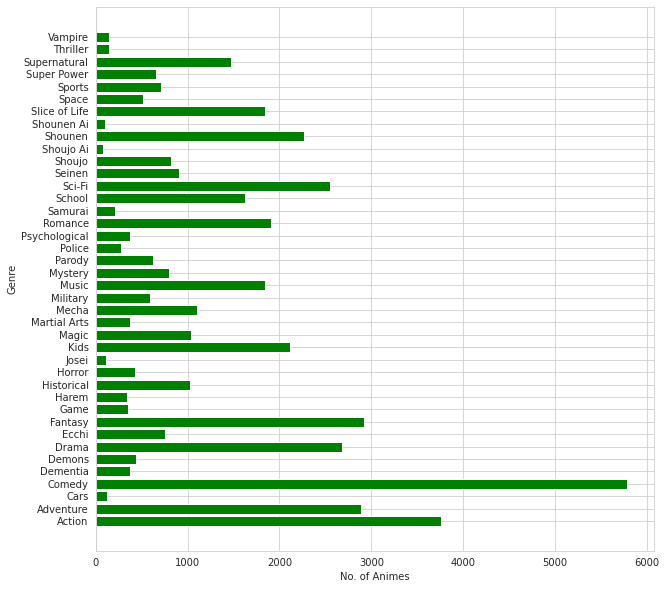

In [524]:
no_anime_genre = []
for genres in genrelist:
  no_anime_genre.append(dfanime[genres].sum())                  #bar graph of no of animes vs all genres
plt.figure(figsize=(10,10))
plt.barh(genrelist, no_anime_genre,color="green")
plt.xlabel("No. of Animes")
plt.ylabel("Genre")
plt.show()

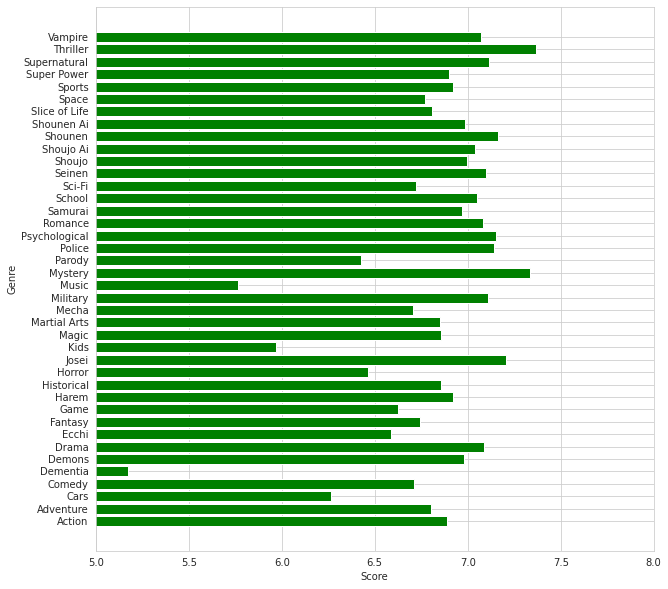

In [525]:
avg_score_genre = []
for i in genrelist:
  avg_score_genre.append(dfanime[dfanime[i]==1]["score"].mean())         #bar graph of avg score of animes vs all genres

plt.figure(figsize=(10,10))
plt.barh(genrelist,avg_score_genre ,color="green")
plt.xlim(5,8)
plt.xlabel("Score")
plt.ylabel("Genre")
plt.show()


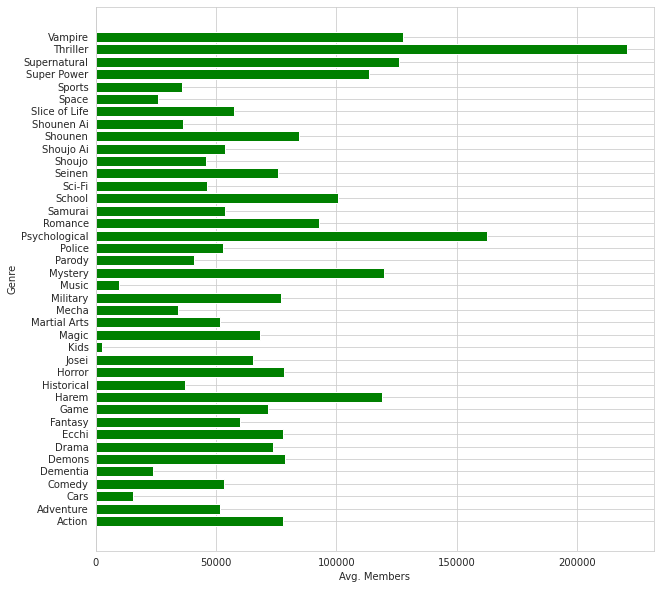

In [526]:
avg_members_genre = []
for i in genrelist:
  avg_members_genre.append(dfanime[dfanime[i]==1]["members"].mean())        #bar graph of average members of animes vs all genres

plt.figure(figsize=(10,10))
plt.barh(genrelist,avg_members_genre ,color="green")
plt.xlabel("Avg. Members")
plt.ylabel("Genre")
plt.show()

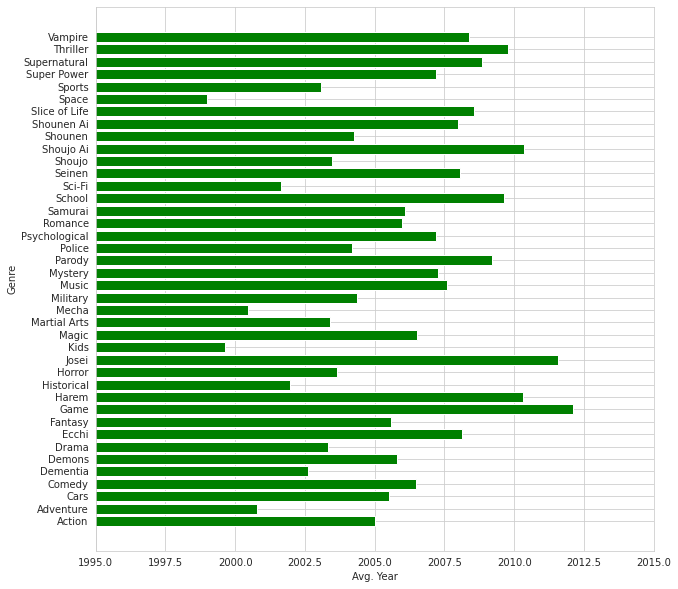

In [527]:
avg_year_genre = []
for i in genrelist:
  avg_year_genre.append(dfanime[dfanime[i]==1]["Year"].mean())                #bar graph of avg Year of animes vs all genres

plt.figure(figsize=(10,10))
plt.barh(genrelist,avg_year_genre ,color="green")
plt.xlim(1995,2015)
plt.xlabel("Avg. Year")
plt.ylabel("Genre")
plt.show()

In [528]:
max_genre_list=[]                                  #list of genres who has maximum no of animes in that year
for i in range(1970,2020):
  df = dfanime[dfanime["Year"]==i]
  max_sum=0
  max_genre=" "
  for j in genrelist:
    if(df[j].sum()>max_sum):
      max_sum = df[j].sum() 
      max_genre = j
  max_genre_list.append(max_genre)

year_genre = pd.DataFrame(list(zip(range(1970,2020),max_genre_list)),columns =['Year' , 'Genre with most no of animes'])
year_genre               #Table of Year & Genre with maximum no of anime

,Year,Genre with most no of animes
0,1970,Sports
1,1971,Kids
2,1972,Kids
3,1973,Adventure
4,1974,Kids
5,1975,Kids
6,1976,Kids
7,1977,Kids
8,1978,Adventure
9,1979,Adventure


In [529]:
max_genre_list1=[]                             #list of genres who has maximum no of avg members of all animes in that year
for i in range(1970,2020):
  df = dfanime[dfanime["Year"]==i]
  max_popularity=0
  max_genre = " "
  for j in genrelist:
    if(df[df[j]==1]["members"].mean() > max_popularity):
      max_popularity = df[df[j]==1]["members"].mean()
      max_genre = j  
  max_genre_list1.append(max_genre)

year_genre1 = pd.DataFrame(list(zip(range(1970,2020),max_genre_list1)),columns =['Year' , 'Genre with most no of animes'])
year_genre1                    # Table of Year & Genre with maximun avg members

,Year,Genre with most no of animes
0,1970,Slice of Life
1,1971,Mystery
2,1972,Horror
3,1973,Drama
4,1974,Military
5,1975,Magic
6,1976,Shoujo
7,1977,Seinen
8,1978,Seinen
9,1979,Seinen


### Age group and Favourite genre

In [530]:
dfage3 = dfprofile[dfprofile["Age"]>(30)]
x = dfprofile[dfprofile["Age"] <=(30)]
dfage2 = x[x["Age"]>(22)]
dfage1 = x[x["Age"]<=(22)]

In [531]:
def Fav_List(df, column):
  fav_list = []
  for lists in df[column]:
    lists = (lists.strip('[]')).split(', ')
    for entry in lists:
      fav_list.append(int(entry.strip("'")))
  return fav_list

In [532]:
def Gen_Prof(df1, df2, column1, column2, column3, list1, list2):
  gen_prof = []
  for uid in list2:
    if len(df1[df1[column1] == uid].index.tolist()) > 0:
      row_ind = df1[df1[column1] == uid].index.tolist()[0]
      for genre in list1:
        if str(genre) in df1[column2][row_ind]:
          gen_prof.append(genre)
  return gen_prof

In [533]:
def plt_genre_age(list1):
  plt.figure(figsize = (10,5))
  plt.xticks(rotation = 90)
  plt.xlabel("Genre")
  plt.ylabel("No. of Favourite Animes")
  sb.countplot(x = sorted(list1))

For age group of (0-22) years

In [534]:
fav_list1 = Fav_List(dfage1, 'favorites_anime')

In [535]:
gen_prof1 = Gen_Prof(dfanime, dfage1, 'uid', 'genre', 'favorites_anime', genrelist, fav_list1)

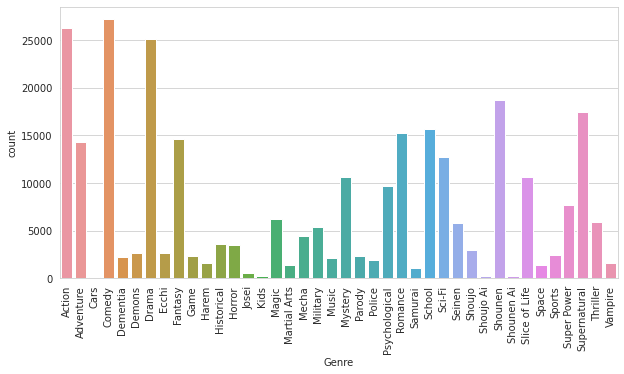

In [536]:
plt_genre_age(gen_prof1)

For age group of (22-30) years

In [537]:
fav_list2 = Fav_List(dfage2, 'favorites_anime')

In [538]:
gen_prof2 = Gen_Prof(dfanime, dfage2, 'uid', 'genre', 'favorites_anime', genrelist, fav_list2)

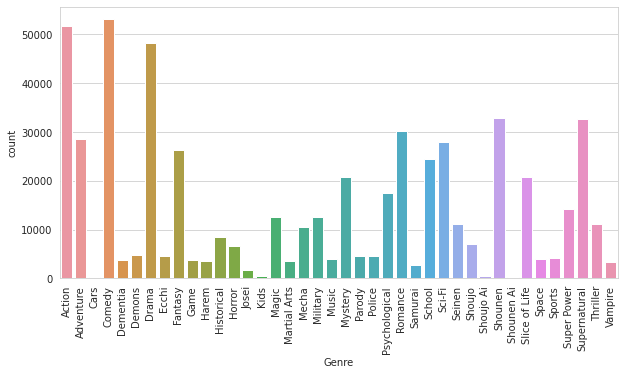

In [539]:
plt_genre_age(gen_prof2)

For the age group of (>30) years

In [540]:
fav_list3 = Fav_List(dfage3, 'favorites_anime')

In [541]:
gen_prof3 = Gen_Prof(dfanime, dfage3, 'uid', 'genre', 'favorites_anime', genrelist, fav_list3)

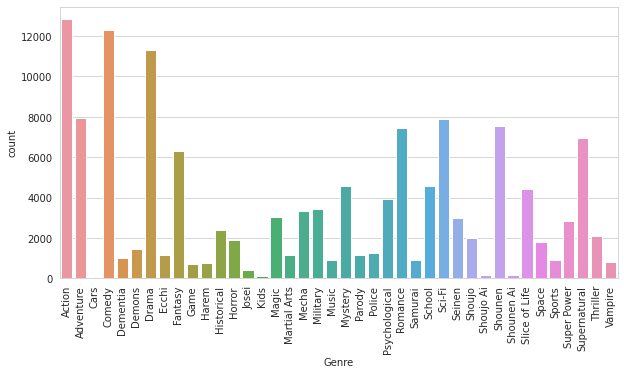

In [542]:
plt_genre_age(gen_prof3)

###Gender and Favourite genre

In [543]:
dfmale = dfprofile[dfprofile["gender"]=="Male"]
dffemale = dfprofile[dfprofile["gender"]=="Female"]

In [544]:
fav_listM = Fav_List(dfmale, 'favorites_anime')
fav_listF = Fav_List(dffemale, 'favorites_anime')

In [545]:
gen_profM = Gen_Prof(dfanime, dfmale, 'uid', 'genre', 'favorites_anime', genrelist, fav_listM)
gen_profF = Gen_Prof(dfanime, dffemale, 'uid', 'genre', 'favorites_anime', genrelist, fav_listF)

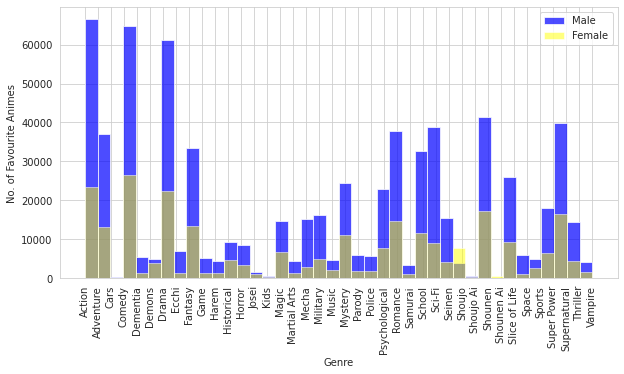

In [546]:
plt.figure(figsize = (10,5))
plt.xticks(rotation = 90)
plt.hist(sorted(gen_profM), label='Male', alpha=.7, bins = 40,color='blue')
plt.hist(sorted(gen_profF), label='Female', alpha=.5, bins = 40 ,color='yellow')
plt.legend()
plt.xlabel("Genre")
plt.ylabel("No. of Favourite Animes")
plt.show()

### Top 5 Anime

In [547]:
import operator
fav_list = fav_listM
fav_list.extend(fav_listF)
frequency = collections.Counter(fav_list)
dict1 = dict(sorted(dict(frequency).items(), key=operator.itemgetter(1), reverse=True)[:5])

In [548]:
for i in list(dict1.keys()):
  print(dfanime[dfanime["uid"]==i]["title"])   #top 5 anime based on favourites

3       Fullmetal Alchemist: Brotherhood
3080    Fullmetal Alchemist: Brotherhood
Name: title, dtype: object
773      Steins;Gate
18281    Steins;Gate
Name: title, dtype: object
740      Death Note
17762    Death Note
Name: title, dtype: object
772      Hunter x Hunter (2011)
18280    Hunter x Hunter (2011)
Name: title, dtype: object
14      Clannad: After Story
3091    Clannad: After Story
Name: title, dtype: object
